In [ ]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Accumulated new capacity'
# List all files in the directory
file_names = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]

for i in file_names:
    if '.xlsx' in i:
        # Load the data
        PBTA = pd.read_excel(i)
        j = re.sub('AccumulatedNewCapacity_', '', i, flags=re.IGNORECASE)
        j = re.sub('.xlsx', '', j, flags=re.IGNORECASE)
        # Define technology names
        Names = {
            'Waste Incineration CHP': ['BristaB2', 'HgldP3468', 'LSVTACHP'],
            'Data Centre Heat Pumps': ['DCACC'],
            'Bio Oil CHP': ['KVV1'],
            'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
            'Bio Oil HOBs': ['DECFOHOB', 'CSBOHOB'],
            'Bio Pellets CHP': ['HslbyP1toP3'],
            'Wood Chips CHP': ['BristaB1', 'KVV8'],
            'Sea Water Heat Pumps': ['VVNHP'],
            'Electric Boilers': ['VVHVELHOB'],
            'Low Temperature Sources Heat Pumps': ['SUPACC'],
            'Year': ['Year']
        }

        technology_colors5 = {
            'Electric Boilers': '#B8860B',          # Coral Red
            'Data Centre Heat Pumps': '#4169E1',    # Turquoise
            'Bio Oil CHP': '#FFDA79',               # Bright Yellow
            'Bio Oil HOBs': '#6A4C93',              # Vivid Purple
            'Bio Pellets CHP': '#D3D3D3',           # Peach Orange
            'Sea Water Heat Pumps': '#56CCF2',      # Bright Sky Blue
            'Sewage Treatment Heat Pumps': '#F45D01', # Bright Orange
            'Low Temperature Sources Heat Pumps': '#EE82EE',  # Pale Green
            'Waste Incineration CHP': '#EF476F',    # Pinkish Red
            'Wood Chips CHP': '#4CAF50'             # Bright Mint Green
        }

       # Filter and pivot the data
        PBTA = PBTA.loc[PBTA['TECHNOLOGY'].isin([item for sublist in Names.values() for item in sublist])]
        pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
        pivot_PBTA.index.name = None
        pivot_PBTA_reset = pivot_PBTA.reset_index()
        pivot_PBTA_reset.rename(columns={'index': 'Year'}, inplace=True)

        # Group the data
        grouped_data = {}
        for category, columns in Names.items():
            grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1)
        grouped_df = pd.DataFrame(grouped_data)

        # Plot settings
        # Set up the plot with a larger size
        fig, ax = plt.subplots(figsize=(8, 6))  # Adjusted figure size

        # Create stacked bar chart
        grouped_df.set_index('Year').plot(kind='bar', stacked=True, color=technology_colors5, edgecolor='grey', width=0.8, ax=ax)
        new_row = grouped_df.iloc[-1] * 1.0001
        new_row['Year'] = grouped_df.iloc[-1]['Year'] + 1

    # Append the new row to the DataFrame
        grouped_df = grouped_df.append(new_row, ignore_index=True)

        # Add labels and title
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Heat Generation Capacity (MW)', fontsize=12)
        plt.title(f'Accumulated New Capacity for scenario {j}', fontsize=14)

        # Filter legend to only show technologies present in the plot
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1.0, 0.5), title='Technologies', ncol=1, fontsize=10)

        # Set the font size for ticks
        plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better visibility
        plt.yticks(fontsize=10)

        # Adjust layout to prevent overlap and make it spacious
        plt.subplots_adjust(left=0.1, right=0.8, top=0.95, bottom=0.1)  # Adjust margins as needed

        # Save fig
        plt.savefig(f'Accumulated New Capacity_{j}.png', format='png', dpi=800, bbox_inches='tight')

        # Show plot
        plt.show()


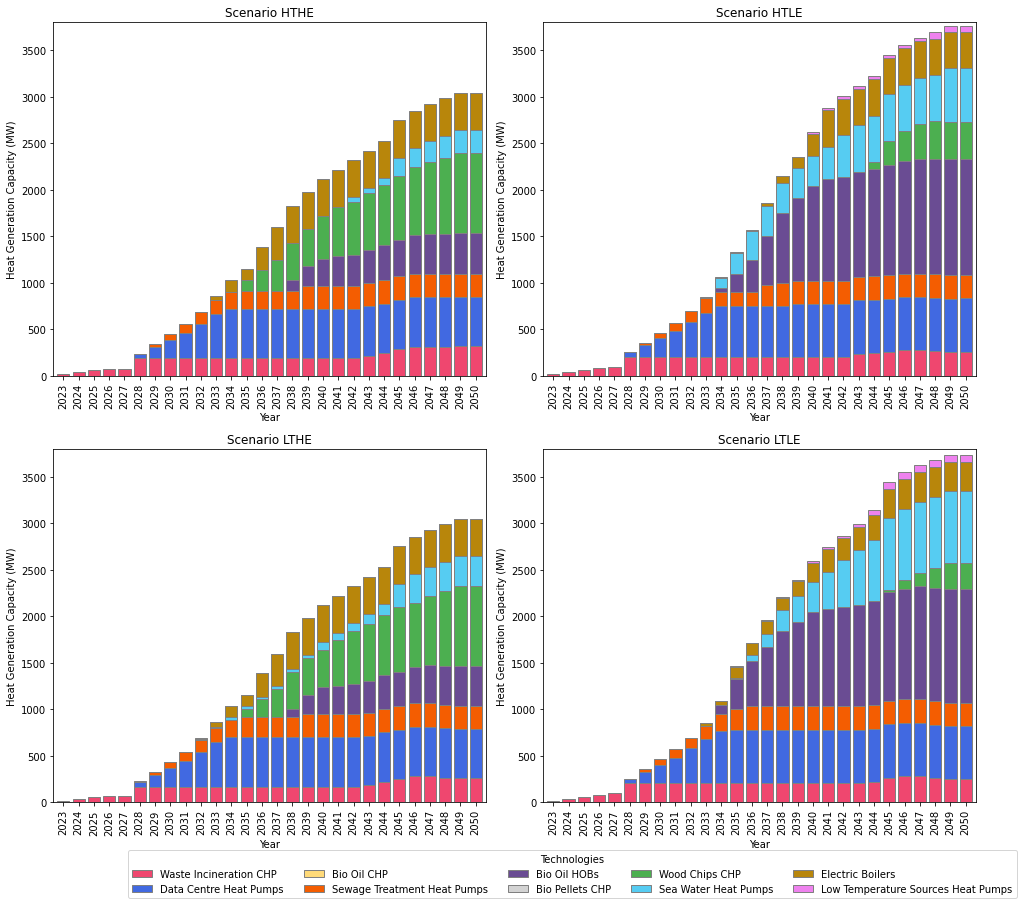

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Accumulated new capacity'
file_names = [file for file in os.listdir(directory_path) if file.endswith('.xlsx')]

# Define technology names and colors
Names = {
    'Waste Incineration CHP': ['BristaB2', 'HgldP3468', 'LSVTACHP'],
    'Data Centre Heat Pumps': ['DCACC'],
    'Bio Oil CHP': ['KVV1'],
    'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
    'Bio Oil HOBs': ['DECFOHOB', 'CSBOHOB'],
    'Bio Pellets CHP': ['HslbyP1toP3'],
    'Wood Chips CHP': ['BristaB1', 'KVV8'],
    'Sea Water Heat Pumps': ['VVNHP'],
    'Electric Boilers': ['VVHVELHOB'],
    'Low Temperature Sources Heat Pumps': ['SUPACC'],
    'Year': ['index']
}

technology_colors5 = {
    'Electric Boilers': '#B8860B',
    'Data Centre Heat Pumps': '#4169E1',
    'Bio Oil CHP': '#FFDA79',
    'Bio Oil HOBs': '#6A4C93',
    'Bio Pellets CHP': '#D3D3D3',
    'Sea Water Heat Pumps': '#56CCF2',
    'Sewage Treatment Heat Pumps': '#F45D01',
    'Low Temperature Sources Heat Pumps': '#EE82EE',
    'Waste Incineration CHP': '#EF476F',
    'Wood Chips CHP': '#4CAF50'
}

# Set up a 2x2 subplot grid with increased figure size
fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # Increased figure size
axs = axs.flatten()

# Loop through files and plot each in a subplot
for idx, i in enumerate(file_names[:4]):  # Limit to 4 files for the 2x2 grid
    # Load and process the data
    PBTA = pd.read_excel(os.path.join(directory_path, i))
    scenario_name = re.sub('AccumulatedNewCapacity_', '', i, flags=re.IGNORECASE)
    scenario_name = re.sub('.xlsx', '', scenario_name, flags=re.IGNORECASE)

    # Filter and pivot the data
    PBTA = PBTA.loc[PBTA['TECHNOLOGY'].isin([item for sublist in Names.values() for item in sublist])]
    pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
    pivot_PBTA.index.name = None
    pivot_PBTA_reset = pivot_PBTA.reset_index()

    # Group data based on technology categories
    grouped_data = {}
    for category, columns in Names.items():
        available_columns = [col for col in columns if col in pivot_PBTA_reset.columns]
        if available_columns:
            grouped_data[category] = pivot_PBTA_reset[available_columns].sum(axis=1)
    grouped_df = pd.DataFrame(grouped_data)
    grouped_df['Year'] = pivot_PBTA_reset['index']
    new_row = grouped_df.iloc[-1] * 1.0001
    new_row['Year'] = grouped_df.iloc[-1]['Year'] + 1

    # Append the new row to the DataFrame
    grouped_df = grouped_df.append(new_row, ignore_index=True)
    grouped_df['Year'] = grouped_df['Year'].fillna(0).astype(int)
    # Plot in the corresponding subplot
    ax = axs[idx]
    grouped_df.set_index('Year').plot(kind='bar', stacked=True, color=technology_colors5, edgecolor='grey', width=0.8, ax=ax)
    
    # Add title and labels
    ax.set_title(f'Scenario {scenario_name}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Heat Generation Capacity (MW)')
    ax.set_ylim(0, 3800)  # Set y-axis limits
    #ax.set_xlim(2023, 2050)  # Set y-axis limits

    # Remove individual legends
    ax.legend().remove()

# Create a single legend for the whole figure, with all unique labels
handles, labels = axs[0].get_legend_handles_labels()
unique_handles_labels = {label: handle for handle, label in zip(handles, labels)}
fig.legend(unique_handles_labels.values(), unique_handles_labels.keys(), loc='lower center', title='Technologies', ncol=5, fontsize=10, bbox_to_anchor=(0.5, -0.05))

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to provide space for the legend
plt.subplots_adjust(right=0.85)  # Adjust right margin to allow more space for the legend
plt.savefig('Combined_Accumulated_Installed_Capacity.png', format='png', dpi=800, bbox_inches='tight')
plt.show()


In [ ]:
grouped_df

In [ ]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Accumulated new capacity'
# List all files in the directory
file_names = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]

for i in file_names:
    if '.xlsx' in i:
        # Load the data
        PBTA = pd.read_excel(i)
        j = re.sub('AccumulatedNewCapacity_', '', i, flags=re.IGNORECASE)
        j = re.sub('.xlsx', '', j, flags=re.IGNORECASE)
        # Define technology names
        Names = {
            'Waste Incineration CHP': ['BristaB2', 'HgldP3468', 'LSVTACHP'],
            'Data Centre Heat Pumps': ['DCACC'],
            'Bio Oil CHP': ['KVV1'],
            'Bio Oil HOBs': ['DECFOHOB', 'CSBOHOB'],
            'Bio Pellets CHP': ['HslbyP1toP3'],
            'Wood Chips CHP': ['BristaB1', 'KVV8'],
            'Sea Water Heat Pumps': ['VVNHP'],
            'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
            'Electric Boilers': ['VVHVELHOB'],
            'Low Temperature Sources Heat Pumps': ['SUPACC'],
            'Year': ['Year']
        }

        technology_colors5 = {
            'Electric Boilers': '#FF0000',          # Coral Red
            'Data Centre Heat Pumps': '#4169E1',    # Turquoise
            'Bio Oil CHP': '#FFDA79',               # Bright Yellow
            'Bio Oil HOBs': '#6A4C93',              # Vivid Purple
            'Bio Pellets CHP': '#D3D3D3',           # Peach Orange
            'Sea Water Heat Pumps': '#56CCF2',      # Bright Sky Blue
            'Sewage Treatment Heat Pumps': '#F45D01', # Bright Orange
            'Low Temperature Sources Heat Pumps': '#EE82EE',  # Pale Green
            'Waste Incineration CHP': '#EF476F',    # Pinkish Red
            'Wood Chips CHP': '#4CAF50'             # Bright Mint Green
        }

        technology_colors = {
            'BristaB2': '#FF6F61',         # Light Coral
            'HgldP3468': '#87CEEB',        # Light Sky Blue
            'LSVTACHP': '#F0E68C',         # Khaki Yellow
            'DCACC': '#8A2BE2',            # Blue Violet
            'KVV1': '#20B2AA',             # Light Sea Green
            'DECFOHOB': '#FFB6C1',         # Light Pink
            'CSBOHOB': '#FFD700',          # Gold
            'HslbyP1toP3': '#BA55D3',      # Medium Orchid
            'BristaB1': '#FF8C00',         # Dark Orange
            'KVV8': '#4682B4',             # Steel Blue
            'VVNHP': '#9ACD32',            # Yellow Green
            'HmrbySEWHP': '#FF6347',       # Tomato
            'VVHVELHOB': '#00FA9A',        # Medium Spring Green
            'SUPACC': '#9370DB',           # Medium Purple
            'Year': '#00CED1'              # Dark Turquoise
        }

        techlist = [item for sublist in [Names[newlist] for newlist in Names] for item in sublist]
        
       # Filter and pivot the data
        PBTA = PBTA.loc[PBTA['TECHNOLOGY'].isin([item for sublist in Names.values() for item in sublist])]
        pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
        pivot_PBTA.index.name = None
        grouped_df = pivot_PBTA.reset_index()
        grouped_df.rename(columns={'index': 'Year'}, inplace=True)

        # Group the data
        # grouped_data = {}
        # for category, columns in Names.items():
        #     grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1)
        # grouped_df = pd.DataFrame(grouped_data)

        # Plot settings
        # Set up the plot with a larger size
        fig, ax = plt.subplots(figsize=(8, 6))  # Adjusted figure size

        # Create stacked bar chart
        grouped_df.set_index('Year').plot(kind='bar', stacked=True, color=technology_colors, edgecolor='grey', width=0.8, ax=ax)

        # Add labels and title
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Heat Capacity (GW)', fontsize=12)
        plt.title(f'Accumulated New Capacity for scenario {j}', fontsize=14)

        # Filter legend to only show technologies present in the plot
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1.0, 0.5), title='Technologies', ncol=1, fontsize=10)

        # Set the font size for ticks
        plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better visibility
        plt.yticks(fontsize=10)

        # Adjust layout to prevent overlap and make it spacious
        plt.subplots_adjust(left=0.1, right=0.8, top=0.95, bottom=0.1)  # Adjust margins as needed

        # Save fig
        plt.savefig(f'Accumulated New Capacity_SE_names_{j}.png', format='png', dpi=800, bbox_inches='tight')

        # Show plot
        plt.show()


In [1]:
from PIL import Image

# List of file paths for each image
image_files = ["Accumulated New Capacity_LTLE.png", "Accumulated New Capacity_HTLE.png", "Accumulated New Capacity_LTHE.png", "Accumulated New Capacity_HTHE.png"]

# Open each image and store it in a list
images = [Image.open(img) for img in image_files]

# Assume all images are the same size (for simplicity)
img_width, img_height = images[0].size

# Create a blank canvas for the 2x2 grid
grid_width = 2 * img_width
grid_height = 2 * img_height
grid_img = Image.new("RGB", (grid_width, grid_height))

# Paste each image into the grid
for i, img in enumerate(images):
    x = (i % 2) * img_width       # Calculate x position (0 or 1)
    y = (i // 2) * img_height      # Calculate y position (0 or 1)
    grid_img.paste(img, (x, y))

# Save or display the combined grid image
grid_img.save("grid_graphs.png")
grid_img.show()

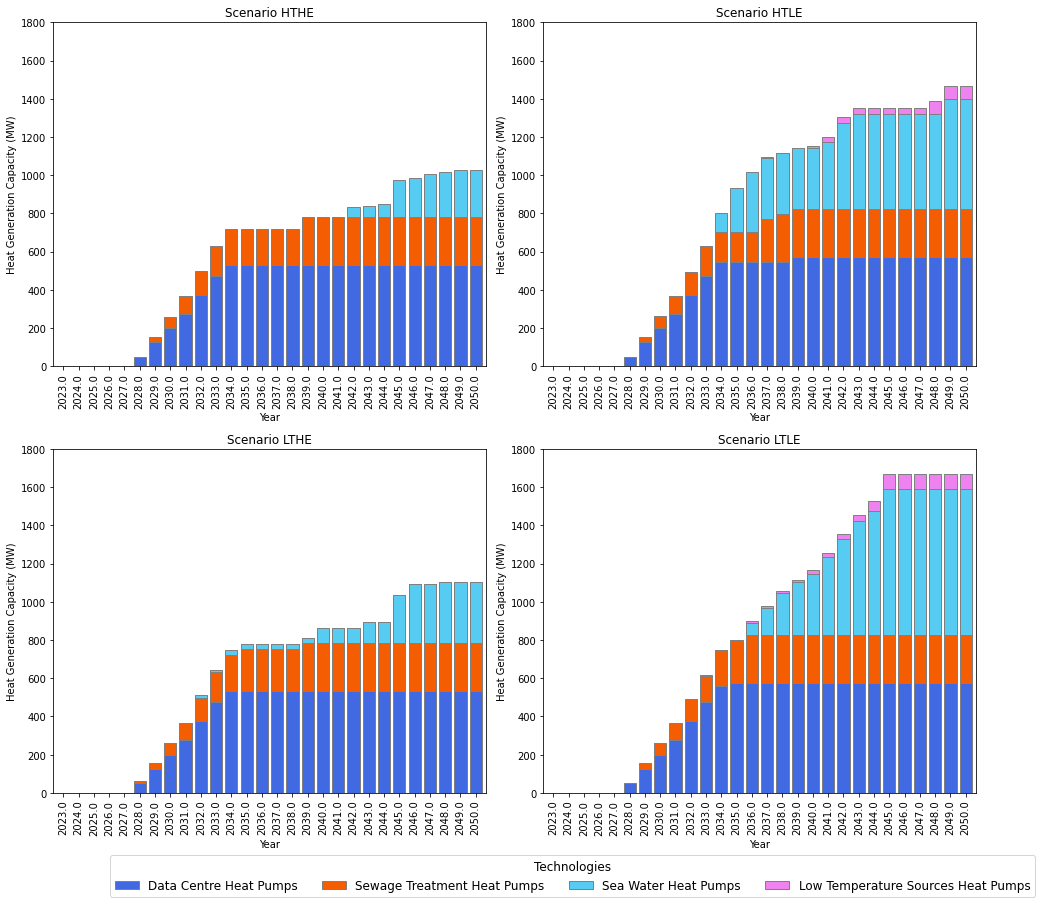

In [32]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Accumulated new capacity'
file_names = [file for file in os.listdir(directory_path) if file.endswith('.xlsx')]

# Define technology names and colors
Names = {
    'Data Centre Heat Pumps': ['DCACC'],
    'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
    'Sea Water Heat Pumps': ['VVNHP'],
    'Low Temperature Sources Heat Pumps': ['SUPACC'],
    'Year': ['index']
}

technology_colors5 = {
    'Electric Boilers': '#B8860B',
    'Data Centre Heat Pumps': '#4169E1',
    'Bio Oil CHP': '#FFDA79',
    'Bio Oil HOBs': '#6A4C93',
    'Bio Pellets CHP': '#D3D3D3',
    'Sea Water Heat Pumps': '#56CCF2',
    'Sewage Treatment Heat Pumps': '#F45D01',
    'Low Temperature Sources Heat Pumps': '#EE82EE',
    'Waste Incineration CHP': '#EF476F',
    'Wood Chips CHP': '#4CAF50'
}

# Set up a 2x2 subplot grid with increased figure size
fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # Increased figure size
axs = axs.flatten()

# Loop through files and plot each in a subplot
for idx, i in enumerate(file_names[:4]):  # Limit to 4 files for the 2x2 grid
    # Load and process the data
    PBTA = pd.read_excel(os.path.join(directory_path, i))
    scenario_name = re.sub('AccumulatedNewCapacity_', '', i, flags=re.IGNORECASE)
    scenario_name = re.sub('.xlsx', '', scenario_name, flags=re.IGNORECASE)

    # Filter and pivot the data
    PBTA = PBTA.loc[PBTA['TECHNOLOGY'].isin([item for sublist in Names.values() for item in sublist])]
    pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
    pivot_PBTA.index.name = None
    pivot_PBTA_reset = pivot_PBTA.reset_index()

    # Group data based on technology categories
    grouped_data = {}
    for category, columns in Names.items():
        available_columns = [col for col in columns if col in pivot_PBTA_reset.columns]
        if available_columns:
            grouped_data[category] = pivot_PBTA_reset[available_columns].sum(axis=1)
    grouped_df = pd.DataFrame(grouped_data)
    grouped_df['Year'] = pivot_PBTA_reset['index']
    new_row = grouped_df.iloc[-1] * 1.0001
    new_row['Year'] = grouped_df.iloc[-1]['Year'] + 1

    # Append the new row to the DataFrame
    grouped_df = grouped_df.append(new_row, ignore_index=True)

    # Plot in the corresponding subplot
    ax = axs[idx]
    grouped_df.set_index('Year').plot(kind='bar', stacked=True, color=technology_colors5, edgecolor='grey', width=0.8, ax=ax)
    
    # Add title and labels
    ax.set_title(f'Scenario {scenario_name}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Heat Generation Capacity (MW)')
    ax.set_ylim(0, 1800)  # Set y-axis limits

    # Remove individual legends
    ax.legend().remove()

# Create a single legend for the whole figure, with all unique labels
handles, labels = axs[0].get_legend_handles_labels()
unique_handles_labels = {label: handle for handle, label in zip(handles, labels)}
fig.legend(handles, labels, loc='lower center', ncol=5, title='Technologies', title_fontsize=12, fontsize=12, bbox_to_anchor=(0.5, -0.05))  # Position the legend below the plots

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to provide space for the legend
plt.subplots_adjust(right=0.85)  # Adjust right margin to allow more space for the legend
plt.savefig('Combined_Accumulated_Installed_Capacity_UEH.png', format='png', dpi=800, bbox_inches='tight')
plt.show()


In [ ]:
grouped_df
new_row = (grouped_df.iloc[-1] * 1.05).astype(int)
new_row['Year'] = grouped_df.iloc[-1]['Year'] + 1

# Append the new row to the DataFrame
grouped_df = grouped_df.append(new_row, ignore_index=True)
grouped_df